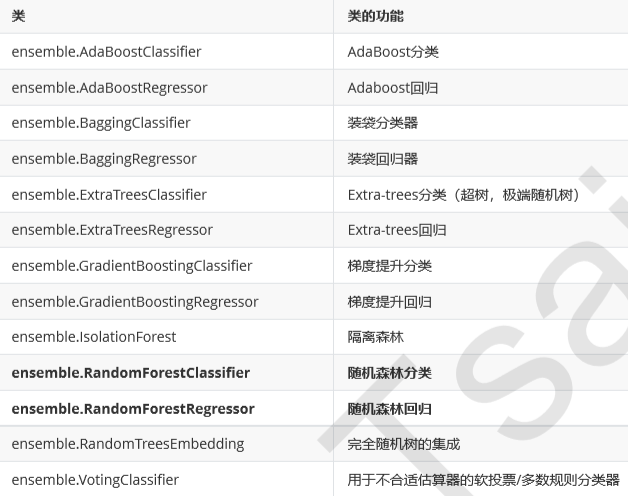

In [ ]:
class sklearn.ensemble.RandomForestClassifier (n_estimators=’10’, # 树"评估器"数量
                                               criterion=’gini’, # 评估指数
                                               max_depth=None, # 深度
                                               min_samples_split=2, #每节点最少样本数，否则不分裂
                                               min_samples_leaf=1, #分裂后子节点都得大于这个数，否则不分裂
                                               min_weight_fraction_leaf=0.0, 
                                               max_features=’auto’, #限制特征数
                                               max_leaf_nodes=None, 
                                               min_impurity_decrease=0.0, #限制信息增益大小
                                               min_impurity_split=None, 
                                               bootstrap=True, #true有放回采样
                                               oob_score=False, 
                                               n_jobs=None, 
                                               random_state=None, 
                                               verbose=0, 
                                               warm_start=False, 
                                               class_weight=None

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [3]:
%config ZMQInteractiveShell.ast_node_interactivity="all"
wine = load_wine()

wine.data
wine.target

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(wine.data,wine.target,test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,ytrain)
rfc = rfc.fit(Xtrain,ytrain)
score_c = clf.score(Xtest,ytest)
score_r = rfc.score(Xtest,ytest)

print("Single Tree:{}".format(score_c)
      ,"Random Forest:{}".format(score_r))

Single Tree:0.8703703703703703 Random Forest:0.9814814814814815


/jxy8/jxy/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


交叉验证效果对比

#目的是带大家复习一下交叉验证 

#交叉验证：是数据集划分为n分，依次取每一份做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法
 

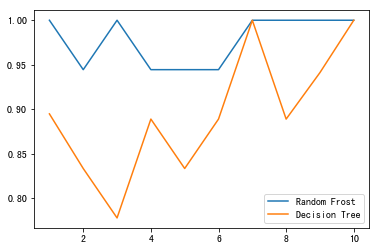

In [6]:
#一组

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label="Random Frost")
plt.plot(range(1,11),clf_s,label="Decision Tree")
plt.legend()
plt.show()


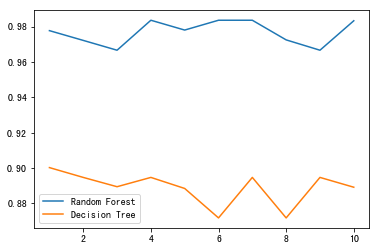

In [7]:
#十组

rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)

plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

0.9891812865497076 26


<Figure size 1440x360 with 0 Axes>

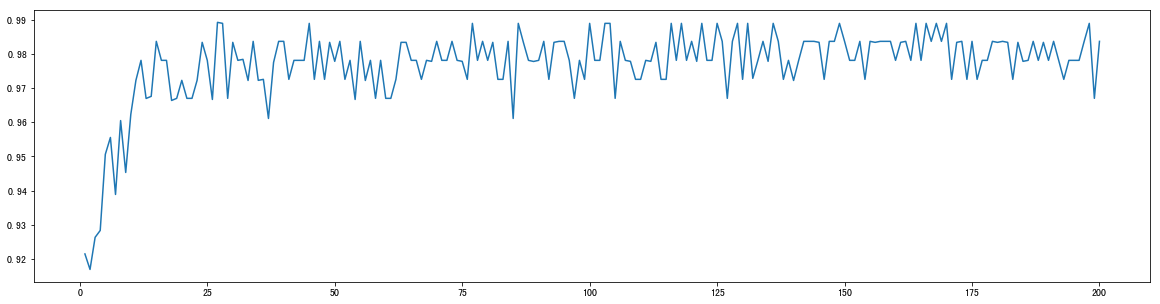

In [8]:
#n_estimators 学习曲线
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()


由上图，可见 n_estimators 设置为100是合理的

In [19]:
#在bagging下，一个随机森林的random_state指的是随机模式，每个estimator都有不同的随机值
rfc = RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(Xtrain,ytrain)

rfc.estimators_[0].random_state

for i in range(len(rfc.estimators_)):
    

1872583848

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


In [21]:
# bootstrap

#一般来说，自助集大约平均会包含63%的原始数据
#未抽中的就是 oob
#也就是说，在使用随机森林时，我们可以不划分测试集和训练集，只需要用袋外 数据来测试我们的模型即可

rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)
 
rfc.oob_score_
rfc.feature_importances_

0.9606741573033708

array([0.15169825, 0.02181474, 0.01499373, 0.01628656, 0.01972661,
       0.08325313, 0.16026138, 0.01261813, 0.01210041, 0.17517136,
       0.07334316, 0.10843892, 0.15029361])

In [27]:
#四个重要接口

rfc = RandomForestClassifier(n_estimators=100)
rfc = rfc.fit(Xtrain,ytrain)


rfc.feature_importances_

rfc.score(Xtest,ytest)
rfc.apply(Xtest)
rfc.predict(Xtest)
rfc.predict_proba(Xtest)

array([0.13606728, 0.03338019, 0.01634752, 0.02934775, 0.02060221,
       0.06104887, 0.18682332, 0.01731459, 0.01945038, 0.15316663,
       0.0800013 , 0.13097521, 0.11547474])

0.9814814814814815

array([[19, 13, 10, ..., 13, 12, 16],
       [19, 13, 10, ..., 13, 12, 13],
       [19, 13, 10, ..., 13, 12, 13],
       ...,
       [ 9,  3,  6, ...,  6,  6,  1],
       [ 3, 13,  3, ..., 12,  3,  9],
       [19, 13, 10, ..., 13, 12, 15]])

array([0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1,
       1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0,
       0, 2, 0, 1, 0, 1, 1, 2, 1, 0])

array([[0.92, 0.07, 0.01],
       [0.97, 0.03, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.2 , 0.27, 0.53],
       [0.15, 0.23, 0.62],
       [0.02, 0.16, 0.82],
       [1.  , 0.  , 0.  ],
       [0.68, 0.27, 0.05],
       [0.99, 0.  , 0.01],
       [0.  , 1.  , 0.  ],
       [0.01, 0.  , 0.99],
       [0.98, 0.02, 0.  ],
       [0.88, 0.12, 0.  ],
       [0.  , 0.99, 0.01],
       [0.07, 0.28, 0.65],
       [0.9 , 0.1 , 0.  ],
       [0.03, 0.96, 0.01],
       [0.  , 1.  , 0.  ],
       [0.  , 0.09, 0.91],
       [0.02, 0.15, 0.83],
       [0.01, 0.56, 0.43],
       [0.24, 0.74, 0.02],
       [0.25, 0.73, 0.02],
       [0.04, 0.96, 0.  ],
       [0.75, 0.24, 0.01],
       [0.01, 0.06, 0.93],
       [0.91, 0.07, 0.02],
       [0.88, 0.09, 0.03],
       [0.99, 0.01, 0.  ],
       [0.09, 0.82, 0.09],
       [0.9 , 0.09, 0.01],
       [0.  , 1.  , 0.  ],
       [0.18, 0.81, 0.01],
       [0.73, 0.27, 0.  ],
       [0.03, 0.97, 0.  ],
       [0.13, 0.86, 0.01],
       [0.01, 0.04, 0.95],
 

RandomForestRegressor

In [ ]:
class sklearn.ensemble.RandomForestRegressor (n_estimators=’warn’, 
                                              criterion=’mse’, 
                                              max_depth=None, 
                                              min_samples_split=2, 
                                              min_samples_leaf=1, 
                                              min_weight_fraction_leaf=0.0, 
                                              max_features=’auto’, 
                                              max_leaf_nodes=None, 
                                              min_impurity_decrease=0.0, 
                                              min_impurity_split=None, 
                                              bootstrap=True, 
                                              oob_score=False, 
                                              n_jobs=None, 
                                              random_state=None, 
                                              verbose=0, 
                                              warm_start=False)


In [10]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import SCORERS

boston = load_boston()
reg = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(reg,boston.data,boston.target,cv=10,scoring="neg_mean_squared_error").mean()

sorted(SCORERS.keys())

-21.765883307921563

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

使用随机森林回归填补缺失值

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_boston

boston = load_boston()
#boston.data.shape  (506.13) 6578个
X_full,y_full = boston.data,boston.target
n_samples = X_full.shape[0]#506
n_fetures = X_full.shape[1]#13

rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples*n_fetures*missing_rate))#3289

miss_feature = rng.randint(0,n_fetures,n_missing_samples)
miss_samples = rng.randint(0,n_samples,n_missing_samples)

#miss_feature array([12,  5,  0, ..., 11,  0,  2])
#miss_samples array([150, 125,  28, ..., 132, 456, 402])

X_missing = X_full.copy()
y_missing = y_full.copy()
X_missing[miss_samples,miss_feature] = np.nan
X_missing = pd.DataFrame(X_missing)
#X_missing


In [13]:
#补均值
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
X_missing_mean = imp_mean.fit_transform(X_missing)#np.ndarray
#补0 
imp_0 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)#np.ndarray
type(imp_0)

sklearn.impute._base.SimpleImputer

In [40]:
#回归森林填补缺失值
#多个特征缺失，首先填补缺失最少的

X_missing_reg = X_missing.copy()
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values
#sortindex #array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11])
for i in sortindex:
    df = X_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
    df_0 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0).fit_transform(df)

    ytrain = fillc[fillc.notnull()]
    ytest = fillc[fillc.isnull()]
    Xtrain = df_0[ytrain.index,:]
    Xtest = df_0[ytest.index,:]
    
    rfre = RandomForestRegressor(n_estimators=100)
    rfre = rfre.fit(Xtrain,ytrain)
    ypredict = rfre.predict(Xtest)#np.ndarray
    
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = ypredict
    
X_missing_reg#最终填补完毕的DF

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.284741,18.000,7.0200,0.10,0.538000,6.71154,65.200,4.090000,1.00,296.00,18.441,391.7832,4.9800
1,0.027310,0.000,5.7726,0.00,0.469000,6.13482,78.900,4.967100,2.00,294.25,18.524,396.9000,9.1400
2,0.027290,16.060,7.0700,0.00,0.472147,7.18500,61.100,4.212365,2.00,242.00,17.866,389.8068,5.1044
3,0.097596,16.510,3.2079,0.00,0.458000,6.83147,45.800,4.716399,3.65,222.00,18.700,392.7830,5.8570
4,0.056623,0.000,2.1800,0.00,0.453590,7.14700,55.900,5.119483,3.87,251.05,18.700,393.9822,5.3300
5,0.084762,0.000,5.1640,0.00,0.456909,6.43000,58.700,6.062200,3.22,222.00,18.700,391.3144,5.2100
6,0.267535,12.500,8.7748,0.00,0.524000,6.10319,66.600,5.560500,4.01,306.46,15.200,388.8039,12.4300
7,0.365638,12.500,9.7188,0.57,0.524000,6.45770,96.100,5.950500,5.74,311.00,15.200,396.9000,19.1500
8,0.315535,10.180,7.8700,0.01,0.524000,5.63100,78.248,6.082100,5.00,311.00,17.026,370.0292,29.9300
9,0.170040,16.310,7.8700,0.00,0.524000,5.86066,68.284,6.592100,5.43,311.00,17.082,386.7100,14.4532


In [44]:
X = [X_full,X_missing_mean,X_missing_0,X_missing_reg]
mse = []
std = []
for x in X:
    estimator = RandomForestRegressor(random_state=0,n_estimators=100)
    scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error',cv=10).mean()
    mse.append(scores * -1)

<Figure size 864x432 with 0 Axes>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

Text(0.5, 1.0, 'imputation tech with boston dataset')

(17.676603835799998, 49.94317591137254)

Text(0.5, 0, 'MSE')

[Text(0, 0, 'full data'),
 Text(0, 0, 'zero_imputation'),
 Text(0, 0, 'mean imputation'),
 Text(0, 0, 'Regressor imputation')]

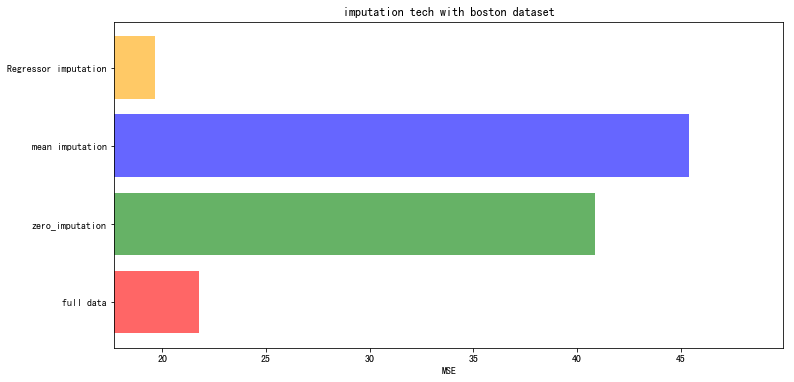

In [46]:
X_labels =['full data','zero_imputation','mean imputation','Regressor imputation']
colors = ['r','g','b','orange']

plt.figure(figsize=(12,6))
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i,mse[i],color=colors[i],alpha=0.6,align='center')
ax.set_title('imput
             ation tech with boston dataset')
ax.set_xlim(left=np.min(mse)*0.9,right=np.max(mse)*1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(X_labels)
plt.show()

1）模型太复杂或者太简单，都会让泛化误差高，我们追求的是位于中间的平衡点 

2）模型太复杂就会过拟合，模型太简单就会欠拟合 

3）对树模型和树的集成模型来说，树的深度越深，枝叶越多，模型越复杂

4）树模型和树的集成模型的目标，都是减少模型复杂度，把模型往图像的左边移动 

复杂度高，方差高，总泛化误差高。

复杂度低，偏差高，总泛化误差高。 

调参的目标是，达到方差和偏差的完美平衡。以随机森林为代表的装袋法的训练过程旨在降 低方差，即降低模型复杂度，所以随机森林参数的默认设定都是假设模型本身在泛化误差最低点的右边

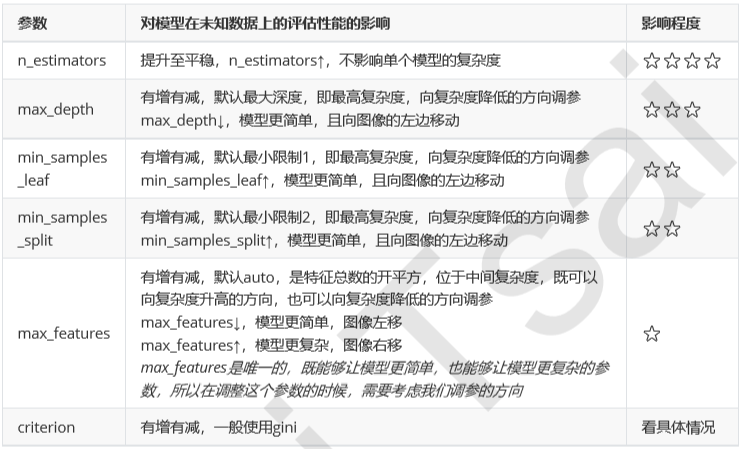